0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
(18600L, 200L, 55L)

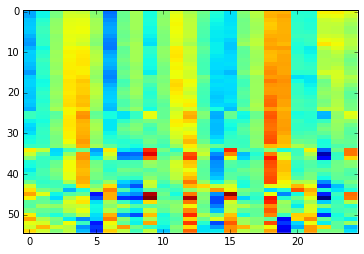

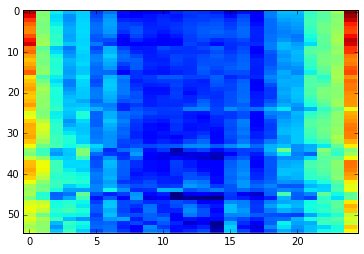

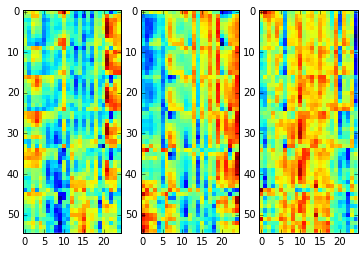

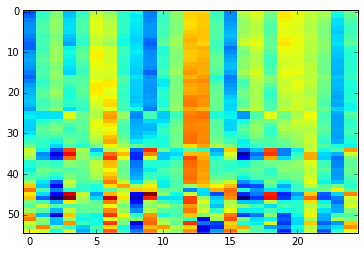

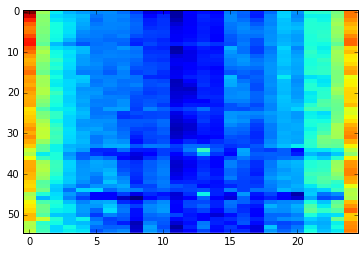

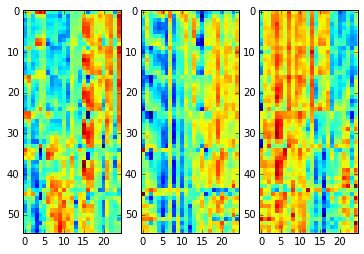

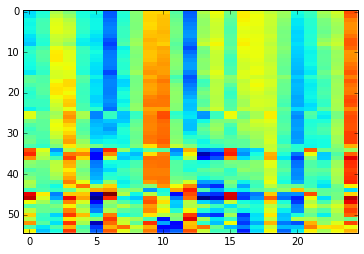

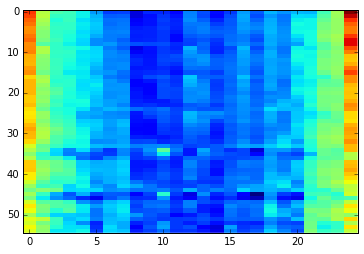

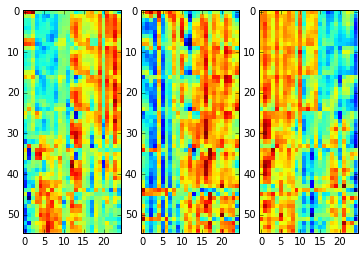

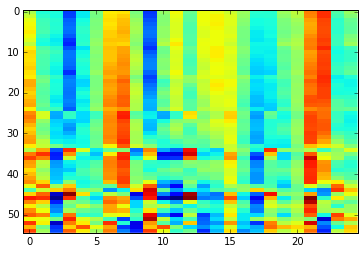

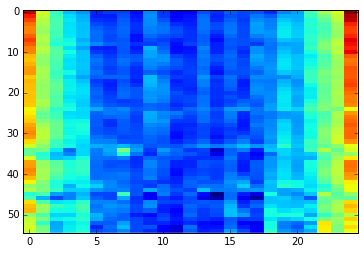

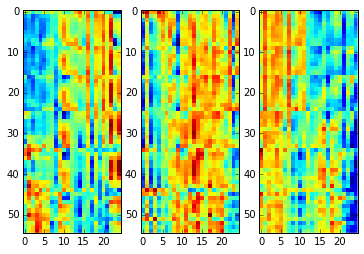

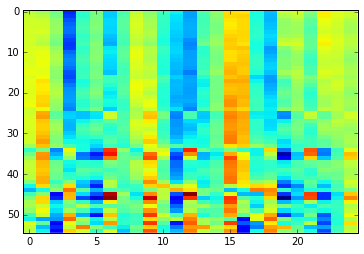

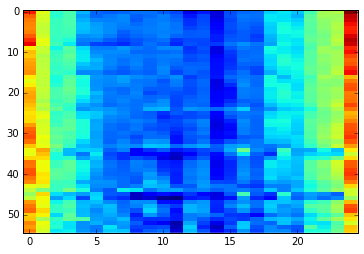

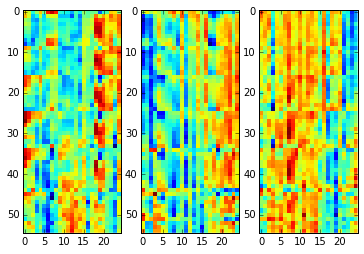

In [5]:
import sys
sys.path.extend(['C:\\git\\thesis_clean_v2'])
import numpy as np


from OriKerasExtension.ThesisHelper import readCompleteMatFile, ExtractDataVer4


from keras.utils.np_utils import to_categorical
from scipy import stats



import pickle
import matplotlib.pyplot as plt
%matplotlib inline 

data_source_dir = r'C:\Users\ORI\Documents\Thesis\dataset_all\\'
__author__ = 'ORI'
# I should learn how to load libraries in a more elegant way
# ABC_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
#             'v', 'w', 'x', 'y', 'z', '_', '.', '!', '<']


from experiments.pretrained_by_colors.color_utils import create_color_dictionary, get_color_from_stimuli


def create_evaluation_data(gcd_res, down_samples_param):
    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'], gcd_res['target'],
                                    -200, 800)

    temp_data_for_eval = downsample_data(data_for_eval[0], data_for_eval[0].shape[1], down_samples_param)

    test_data_gcd, test_target_gcd = temp_data_for_eval[gcd_res['train_mode'] != 1], data_for_eval[1][
        gcd_res['train_mode'] != 1]
    return test_data_gcd, test_target_gcd


def downsample_data(data, number_of_original_samples, down_samples_param):
    new_number_of_time_stamps = number_of_original_samples / down_samples_param

    temp_data_for_eval = np.zeros((data.shape[0], new_number_of_time_stamps, data.shape[2]))

    for new_i, i in enumerate(range(0, number_of_original_samples, down_samples_param)):
        temp_data_for_eval[:, new_i, :] = np.mean(data[:, range(i, (i + down_samples_param)), :], axis=1)
    return temp_data_for_eval


# def get_color_from_stimuli(stimulus_vetor, color_dictionary):
#     #     red (fRyGk<),
#     #     white (pJUX!E),
#     #     blue (iSwc_N),
#     #     green (TBMqAH),
#     #     black (LdvOz.).
#     return [color_dictionary[x] for x in stimulus_vetor]





def create_train_data_color(gcd_res, down_samples_param):
    last_time_stamp = 800
    fist_time_stamp = -200
    color_dictionary = create_color_dictionary()
    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'],
                                    gcd_res['target'], fist_time_stamp, last_time_stamp)

    print data_for_eval[0].shape
    temp_data_for_eval = downsample_data(data_for_eval[0], data_for_eval[0].shape[1], down_samples_param)

    all_data = temp_data_for_eval[np.all([gcd_res['train_mode'] != 3], axis=0)]
    categorical_tags = to_categorical(
        get_color_from_stimuli(gcd_res['stimulus'][gcd_res['train_mode'] != 3], color_dictionary))

    shuffeled_samples, suffule_tags = (all_data, categorical_tags)
    return shuffeled_samples, suffule_tags


def create_train_data(gcd_res, down_samples_param):
    all_positive_train = []
    all_negative_train = []


    last_time_stamp = 800
    fist_time_stamp = -200


    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'],
                                    gcd_res['target'], fist_time_stamp, last_time_stamp)


    print data_for_eval[0].shape
    temp_data_for_eval = downsample_data(data_for_eval[0],data_for_eval[0].shape[1], down_samples_param)

    positive_train_data_gcd = temp_data_for_eval[
        np.all([gcd_res['train_mode'] != 3, gcd_res['target'] == 1], axis=0)]
    negative_train_data_gcd = temp_data_for_eval[
        np.all([gcd_res['train_mode'] != 3, gcd_res['target'] == 0], axis=0)]
    all_positive_train.append(positive_train_data_gcd)
    all_negative_train.append(negative_train_data_gcd)

    positive_train_data_gcd = np.vstack(all_positive_train)
    negative_train_data_gcd = np.vstack(all_negative_train)

    all_data = np.vstack([positive_train_data_gcd, negative_train_data_gcd])

    all_tags = np.vstack(
        [np.ones((positive_train_data_gcd.shape[0], 1)), np.zeros((negative_train_data_gcd.shape[0], 1))])
    categorical_tags = to_categorical(all_tags)

    # shuffeled_samples, suffule_tags = shuffle(all_data, categorical_tags, random_state=0)
    shuffeled_samples, suffule_tags = (all_data, categorical_tags)
    return shuffeled_samples, suffule_tags

def create_test_data(gcd_res, down_samples_param):
    all_positive_train = []
    all_negative_train = []


    last_time_stamp = 800
    fist_time_stamp = -200


    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'],
                                    gcd_res['target'], fist_time_stamp, last_time_stamp)


    print data_for_eval[0].shape
    temp_data_for_eval = downsample_data(data_for_eval[0],data_for_eval[0].shape[1], down_samples_param)

    positive_train_data_gcd = temp_data_for_eval[
        np.all([gcd_res['train_mode'] == 3, gcd_res['target'] == 1], axis=0)]
    negative_train_data_gcd = temp_data_for_eval[
        np.all([gcd_res['train_mode'] == 3, gcd_res['target'] == 0], axis=0)]
    all_positive_train.append(positive_train_data_gcd)
    all_negative_train.append(negative_train_data_gcd)

    positive_train_data_gcd = np.vstack(all_positive_train)
    negative_train_data_gcd = np.vstack(all_negative_train)

    all_data = np.vstack([positive_train_data_gcd, negative_train_data_gcd])

    all_tags = np.vstack(
        [np.ones((positive_train_data_gcd.shape[0], 1)), np.zeros((negative_train_data_gcd.shape[0], 1))])
    categorical_tags = to_categorical(all_tags)

    # shuffeled_samples, suffule_tags = shuffle(all_data, categorical_tags, random_state=0)
    shuffeled_samples, suffule_tags = (all_data, categorical_tags)
    return shuffeled_samples, suffule_tags


def create_letter_test_data_color(gcd_res, down_samples_param):
    last_time_stamp = 800
    fist_time_stamp = -200
    color_dictionary = create_color_dictionary()
    data_for_eval = ExtractDataVer4(gcd_res['all_relevant_channels'], gcd_res['marker_positions'],
                                    gcd_res['target'], fist_time_stamp, last_time_stamp)

    print data_for_eval[0].shape
    temp_data_for_eval = downsample_data(data_for_eval[0], data_for_eval[0].shape[1], down_samples_param)

    all_data = temp_data_for_eval[np.all([gcd_res['train_mode'] == 3], axis=0)]

    categorical_tags = to_categorical(
        get_color_from_stimuli(gcd_res['stimulus'][gcd_res['train_mode'] == 3], color_dictionary))
    shuffeled_samples, suffule_tags = (all_data, categorical_tags)
    return shuffeled_samples, suffule_tags


def create_data_for_compare_by_repetition(file_name):
    gcd_res = readCompleteMatFile(file_name)
    sub_gcd_res = dict(train_trial=gcd_res['train_trial'][gcd_res['train_mode'] == 3],
                       train_block=gcd_res['train_block'][gcd_res['train_mode'] == 3],
                       stimulus=gcd_res['stimulus'][gcd_res['train_mode'] == 3])
    return sub_gcd_res


data_set_locations = ["RSVP_Color116msVPicr.mat",
                      "RSVP_Color116msVPpia.mat",
                      "RSVP_Color116msVPfat.mat",
                      "RSVP_Color116msVPgcb.mat",
                      "RSVP_Color116msVPgcc.mat",
                      "RSVP_Color116msVPgcd.mat",
                      "RSVP_Color116msVPgcf.mat",
                      "RSVP_Color116msVPgcg.mat",
                      "RSVP_Color116msVPgch.mat",
                      "RSVP_Color116msVPiay.mat",
                      "RSVP_Color116msVPicn.mat"];




if __name__ == "__main__":
    import matplotlib.pyplot as plt

    file_name = r'C:\Users\ORI\Documents\Thesis\dataset_all\{0}'.format(data_set_locations[2])

    gcd_res = readCompleteMatFile(file_name)
    subject_results = dict()
    down_sample_param = 8
    train_data, train_tags = create_train_data_color(gcd_res, down_samples_param=down_sample_param)

    # np.mean(train_data[train_tags[:,0] == 2,:,:],axis=0).shape, train_tags[:,0] == 1
    for i in range(5):
        plt.imshow(np.mean(stats.zscore(train_data[train_tags[:,i] == 1,:,:], axis=1),axis=0).T, interpolation='none',aspect='auto')
        plt.show()
        plt.imshow(np.std(stats.zscore(train_data[train_tags[:,i] == 1,:,:], axis=1),axis=0).T, interpolation='none',aspect='auto')
        plt.show()
        plt.subplot(1,3,1)
        plt.imshow(stats.zscore(train_data[train_tags[:,i] == 1,:,:], axis=1)[0].T, interpolation='none',aspect='auto')
        plt.subplot(1,3,2)
        plt.imshow(stats.zscore(train_data[train_tags[:,i] == 1,:,:], axis=1)[1].T, interpolation='none',aspect='auto')
        plt.subplot(1,3,3)
        plt.imshow(stats.zscore(train_data[train_tags[:,i] == 1,:,:], axis=1)[2].T, interpolation='none',aspect='auto')
        plt.show()

In [ ]:
file_name = r'C:\Users\ORI\Documents\Thesis\dataset_all\{0}'.format(data_set_locations[0])

gcd_res = readCompleteMatFile(file_name)
subject_results = dict()
down_sample_param = 8
train_data, train_tags = create_train_data_color(gcd_res, down_samples_param=down_sample_param)